# Foreword: 
***This exercise was part of my Machine Learning course from Pierian Data Inc. I have included this in my porfolio because it demonstrates the techniques I learned through the course. I have deleted sections, added my code solution, added comments to the code, and added steps that were not part of the original exercise.***
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Linear Regression Project Exercise 

Now that we have learned about feature engineering, cross validation, and grid search, let's test all your new skills with a project exercise in Machine Learning. This exercise will have a more guided approach, later on the ML projects will begin to be more open-ended. We'll start off with using the Ames Housing dataset. Your goal will be to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

---
---
---
## Complete the tasks in bold

**TASK: Run the cells under the Imports and Data section to make sure you have imported the correct general libraries. Later on you may need to run further imports from scikit-learn.**

### Imports

Import the libraries that I may use as I read in the data and start to explore it.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

I read in the data using Pandas

In [11]:
df = pd.read_csv("DATA/Ames_Housing_Data.csv")

Now I look at the first few rows. This allows me to see the titles of the columns and helps me see the format of the data under the column titles. 

In [12]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


It appears there are 80 columns of features (describing the houses/property) and a label ("SalePrice" of the house).

The data files came with a file to help us understand what the columns are and what the data represents. I will open and read in this file, so I can refer back to it if I have any questions as I explore the data.

In [13]:
with open('DATA/Ames_Housing_Feature_Description.txt','r') as des: 
    print(des.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

The next step is to see how the features are correlated to each other and to the sale price. I will use Seaborn to plot the data on a heat map graph.

C:\Users\Joseph\AppData\Local\Temp\ipykernel_2968\2765699530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


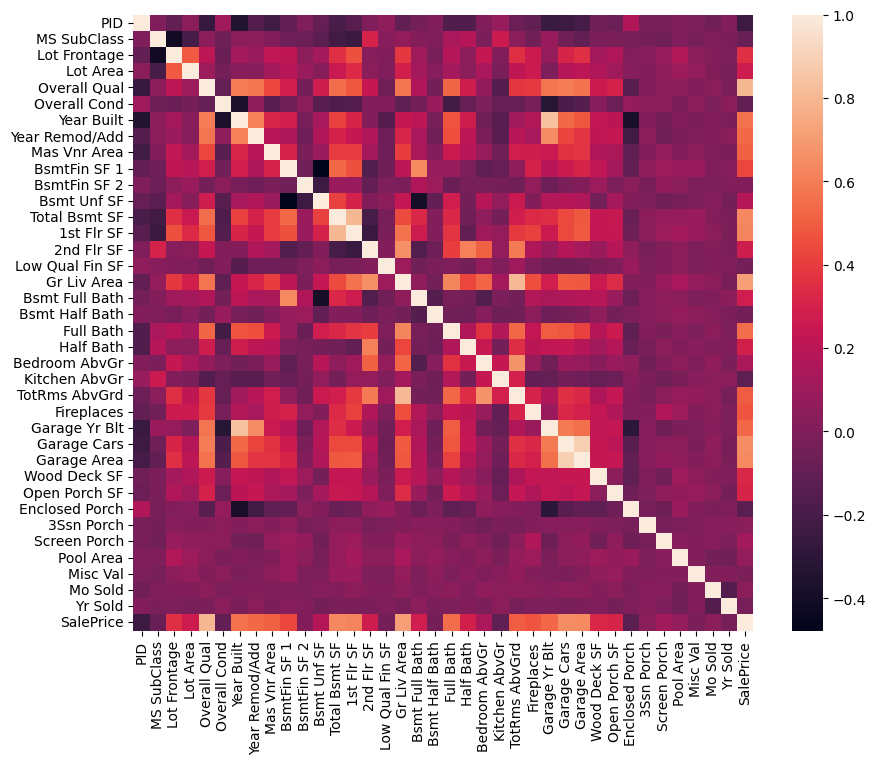

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());

**Intuition on the heatmap graph above**

The lighter colors show a higher correlation than the darker colors. I can gain a couple of insights from this graph to help me understand the data a little more. For example, there is a lighter square that encompasses "Garage Yr Blt", "Garage Cars", and "Garage Area". This basically tells me that "Garage Cars" or the number of cars that you can fit in the garage is related to the "Garage Area" or the size of the garage. Meaning the larger the garage the more cars you can fit. These are related to the "Garage Yr Blt" or the year the garage was built. Most likely meaning the newer the garage or house the larger the garage.

If I look at the "SalePrice" column I can gain some intuition on what effects the sale price of the home. For example, "Overall Qual" is a lighter color. Telling me that the overall quality of the home will effect its sale price. Other areas "1st Flr SF" (first floor square footage), "Total Bsmt SF" (total basement square footage), and "Gr Liv Area" (above ground living area) are about the same color. These indicate the size of the house will also effect the sale price of the house.

----------
Now that I have gain some intuition on the data through a visual study, now I'll take a quantitative approach. I focus on the "SalePrice" column of the correlation and sort the values to show numerically the lowest to highest relation of the features to the sale price.

In [15]:
df.corr()['SalePrice'].sort_values()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_2968\4269891110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

The values above show the percent of correlation to the "SalePrice" with "SalePrice" being 100%. As you can see there are several features that have low negative values, meaning opposite effect on sale price. They are low, so they may have little to no effect.

I assemble a quick plot to see the distribution of the "SalePrice".

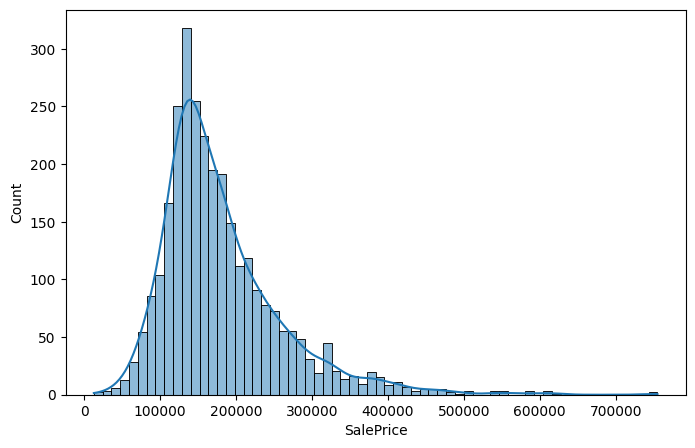

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"],kde=True);

Looks like the a majority of the house prices are in the 100,000 to 200,000 dollar range.

Let's see how the highest correlated feature "Overall Qual" values compare to the "SalePrice".

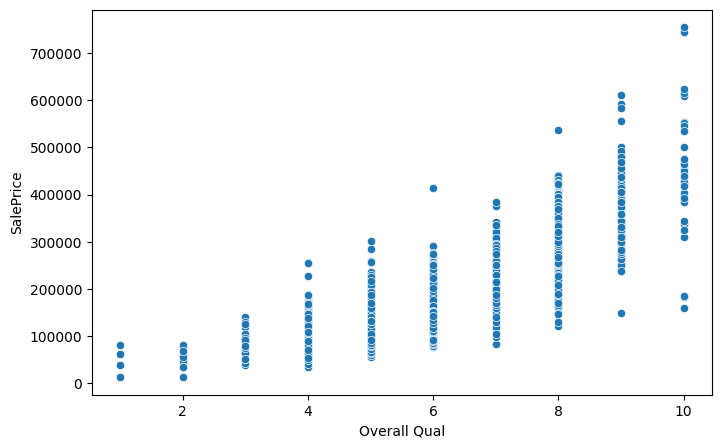

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Overall Qual',y='SalePrice');

The data show a general increasing trend. As the quality increases so does the sale price. It's fairly linear and it appears we have some outliers in the 9 and 10 quality range about 150,000.

Let's look closer at these outliers by filtering the data in this range.

In [18]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


This area pulled up four indexes in this outlier area. The data shows these houses were sold in the 2007-2008 year range, which the housing market was low and may cause these higher quality houses to sell for less. Maybe there is something odd with the property, location or something that may decrease the sale price.

Let's look at the next highest correlation to sale price.

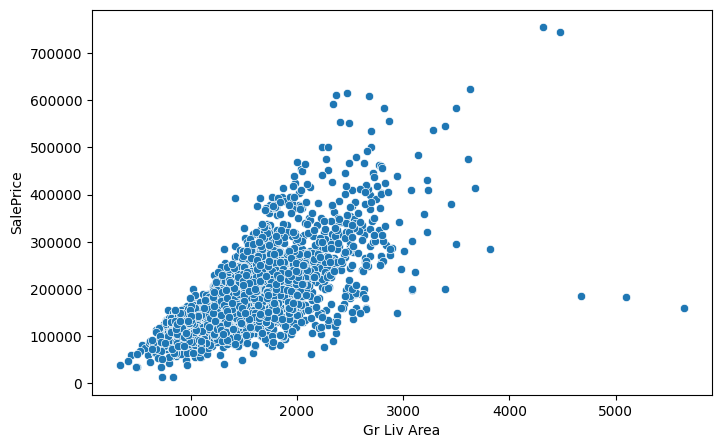

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice');

This data set also shows some outliers in the trend of the data. The three points on the lower right.

Let's filter the data down to take a closer look at these outlier points.

In [20]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Notice these three are three of the four we saw in the previous group with "Overall Qual". These point may skew our model. They have shown to be outliers in a couple of groups. Let's remove these rows from the data set.

In [21]:
outlier_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

I identify the rows I want to remove, then add it to the drop equation.

In [22]:
df = df.drop(outlier_drop,axis=0)

Let's plot our data again to verify the removal worked.

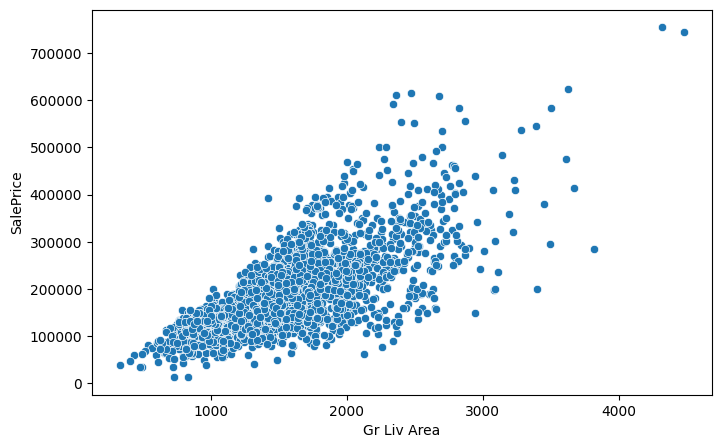

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice');

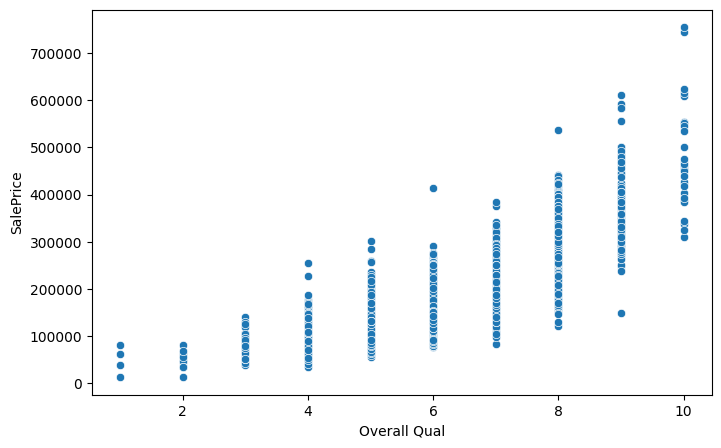

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Overall Qual',y='SalePrice');

Now that I have removed some of the outliers, this is a good point to save a check point. Save the data frame as a new CSV file.

In [25]:
df.to_csv("DATA/Ames_outliers_removed.csv",index=False)

-----------------

### Resolving Missing Data

Pickup where we left off. I will start by looking at what areas are missing data.

Read in the file we saved with the outlier data removed.

In [26]:
df = pd.read_csv("DATA/Ames_outliers_removed.csv")

Pull up the first couple of lines.

In [27]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


As you can see there are several "NaN" just in the first few lines. Let's explore how we want to handle these missing data areas.

The "PID" is just an ID number so it's like index. We don't need two indexes. I can drop the "PID" column.

In [28]:
df=df.drop('PID',axis=1)

Now there are 80 columns in the data set. Info will help us understand how many of these columns have some missing data.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

If we look through these column totals, we can see there are several that are missing a lot of data. I can identify the missing data a little easier by using the .isnull() method.

In [30]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


The .isnull() provides a boolean output, so now I can sum them up to get a numerical count for each column.

In [31]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

Let's try to focus on just the columns with missing data. I create a function to convert to percentage, grab the ones that are greater than zero, and sort them to run from low to high. 

In [32]:
def percent_missing(df):
    percent_miss = 100* df.isnull().sum() / len(df)
    percent_miss = percent_miss[percent_miss>0].sort_values()
    return percent_miss

Then I can run the function and store this set into a variable.

In [33]:
percent_miss = percent_missing(df)

Now that I have the missing data in percentages and set in order, I can graph it.

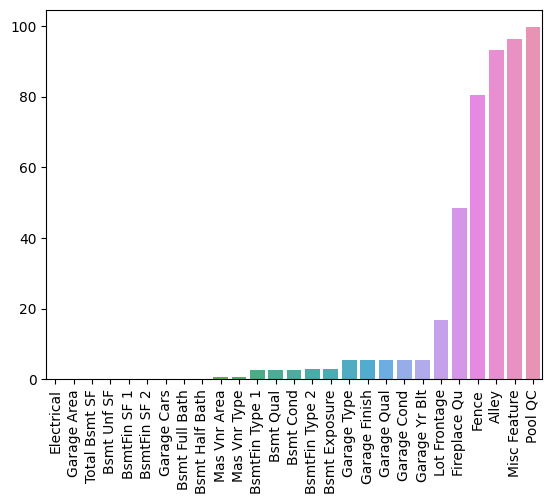

In [34]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90);

You can see that there are several features with a high percentage of the column that is missing data. I set a limit to where I want to look at the feature and decide if I fill the missing data or remove the rows. Let's pick 2% and see where it takes me. 

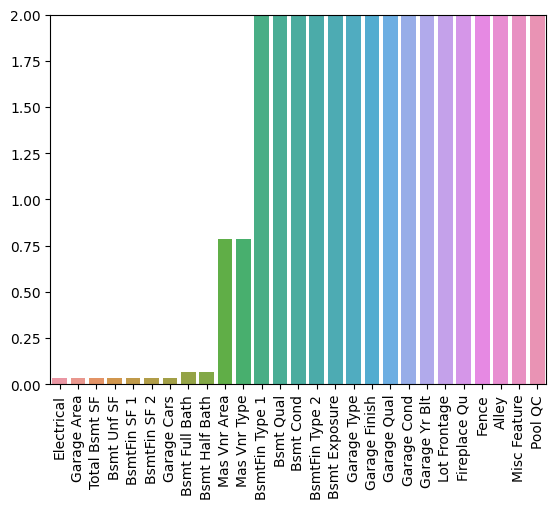

In [35]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90)
# Set 2% Limit
plt.ylim(0,2);

Now that I have essentially zoomed in on the graph, I can see that I could grab a couple more columns if I used a slightly lower percent limit. I move to 0.75%.

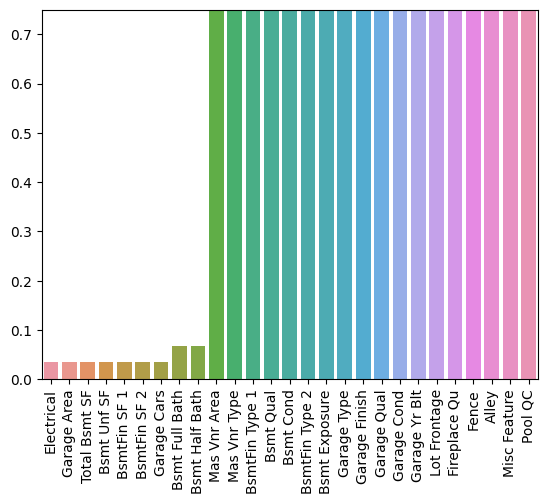

In [36]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90)
# Set 0.75% Limit
plt.ylim(0,0.75);

Let's first look at the lower percent group to the left and decide if I want to fill or remove.

I grab all those that are lower than 0.75%

In [37]:
percent_miss[percent_miss < 0.75]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
dtype: float64

It appears most of these groups are missing the same amount of data, 0.034%. What does this percentage mean? Let's look at a couple of these columns a little closer and see how this percentage translates into rows of missing data.

In [38]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


The lower percentage shows one row. What does the higher percentage show?

In [39]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


This shows that there are one or two data points missing in these columns. These are so small we could just drop them, but let's demonstrate how to fill in some missing data points of the columns with numerical data with '0'. After looking back at the description of the column titles, these are the numerical columns.

In [40]:
bsmt_num_cols = ['Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

To simplify the data a little, I will drop the rest.

In [41]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars','BsmtFin SF 1', 'BsmtFin SF 2'])

I grab some of the categorical data columns to show how I would fill missing data with a string.

In [42]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

Let's look at the percent missing data set again to see what columns still need some attention. I will raise the limit a little.

In [43]:
percent_miss = percent_missing(df)

Then graph the percent missing data.

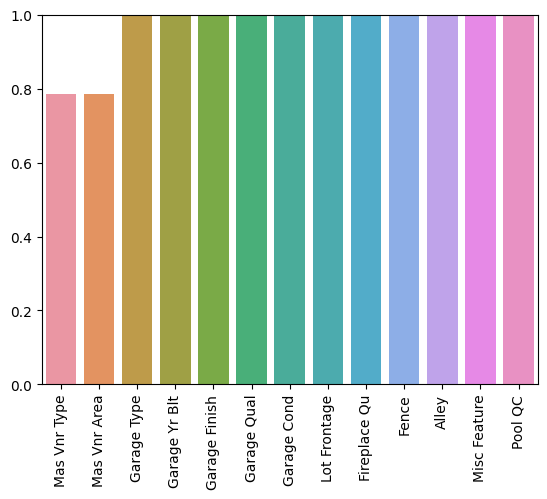

In [44]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90);
plt.ylim(0,1);

Looks like there are two more columns to deal with before we zoom out further.
One is categorical, so I will fill it with a string, "None". The other is numerical, so I will fill this one with "0".

In [45]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

Let's zoom out and see how much data is missing for these other columns.

In [46]:
percent_miss = percent_missing(df)

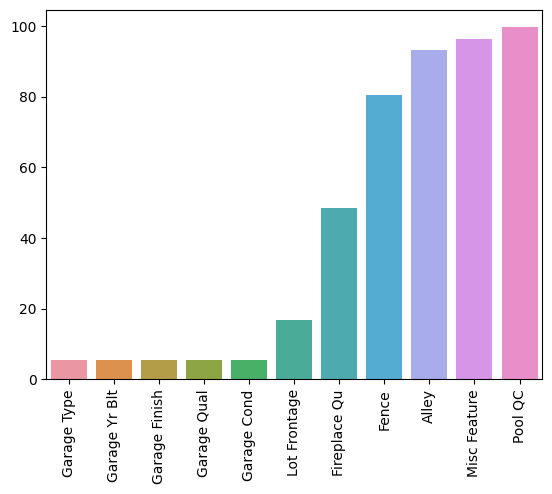

In [47]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90);

The garage columns seem to be about the same level. Let's work on these next. It looks like some are numeric and some are categorical. I will fill these with "None" and '0' as well.

In [48]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]=df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('None')

In [49]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

Pull the percent missing again and graph it.

In [50]:
percent_miss = percent_missing(df)

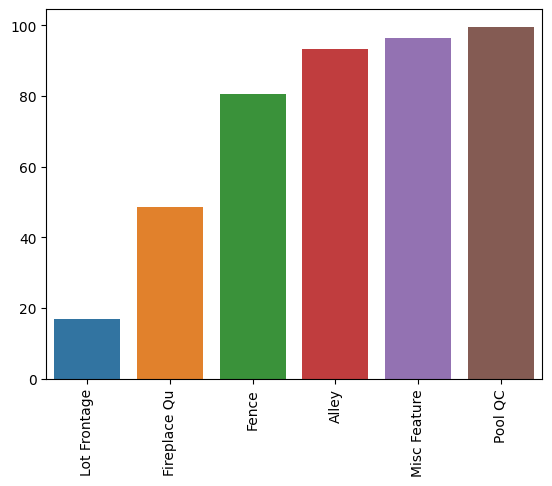

In [51]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90);

The features on the right side of the graph are missing so much data it would be difficult for us to fill to missing spots with a correct fill and not skew the data set. It would be best to drop these.

In [52]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

This leaves us with the last two columns 'Lot Frontage' and 'Fireplace Qu'. 

In [53]:
percent_miss = percent_missing(df)

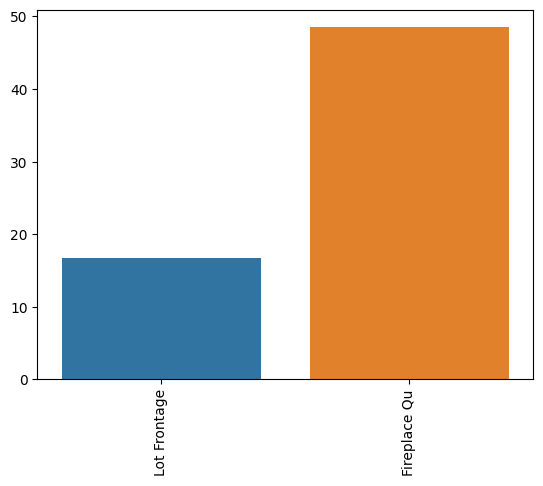

In [54]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90);

The 'Fireplace Qu' is the quality of the fireplace. If the house didn't have a fireplace, the one gathering the data may have left the field blank. Let's fill it with "None".

In [55]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

The 'Lot Frontage' is a numerical field. I should be able to base this value on the neighborhood. Most of the time a home builder will build a whole neighborhood. The lot frontage sizes are going to be relatively the same size. I will need to find the neighborhood associated with the missing value and then calculate the average lot size for that neighborhood. Then I can fill the missing value with this average.

Create a data frame of just the missing lot data.

In [56]:
lot_na = df[df['Lot Frontage'].isnull()]

Look at the missing data's associated neighborhoods.

In [57]:
lot_na[['Lot Frontage','Neighborhood']]

,Lot Frontage,Neighborhood
11,NaN,Gilbert
14,NaN,StoneBr
22,NaN,Somerst
23,NaN,NAmes
24,NaN,NAmes
...,...,...
2891,NaN,Timber
2894,NaN,Timber
2895,NaN,Timber
2909,NaN,Mitchel


Looks like this is a good approach. Now I need to find the average lot frontage size by neighborhood.

In [58]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

There are a couple of neighborhoods that are missing information. I will have to deal with these afterwords if they line up with the lot frontage missing data.

I use the pandas transform method, to apply the average lot frontage value of the neighborhood to the missing lot frontage.

In [59]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

I check to see if there is some lot frontage values missing.

In [60]:
percent_miss = percent_missing(df)

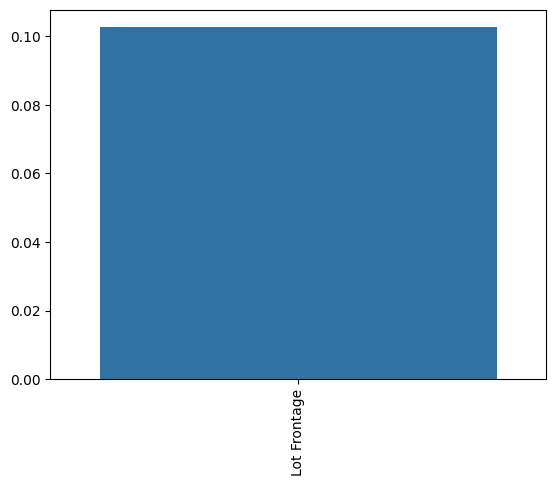

In [61]:
sns.barplot(x=percent_miss.index,y=percent_miss)
plt.xticks(rotation=90);

Looks like there are some that lined up with the missing neighborhood averages, so we will fill these in with a '0'.

In [62]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

Check our missing data set again to make sure I resolved all the issues.

In [63]:
percent_miss = percent_missing(df)

In [64]:
percent_miss

Series([], dtype: float64)

Looks like I have address the missing data. This would be a good point to save another checkpoint.

In [65]:
df.to_csv("DATA/Ames_NO_Missing_Data.csv",index=False)

--------------------

### **Dealing with Categorical data**

I pick up from where I left of by reading in the previously saved file.

In [66]:
df = pd.read_csv("DATA/Ames_NO_Missing_Data.csv")

Check to see if things read in correctly.

In [67]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


As I prepare to run a linear regression on this data set, I need to make sure the data is in the right form. The categorical data will need to be converted to a value. I will also need to make sure the values are true numerical values not just values representing a string. For instance, if you look at "MSSubClass" in the data description. It has a value, but it is representative value.

In [68]:
with open('DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

You can see above the "MSSubClass" is a value representing a description. Scanning through the data description, this seems to be one of a couple of columns with a value representing a description.

I'll start with the "MS SubClass" and convert it to what it really is, a string.

In [69]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

Now I divide the data set into the numerical columns and the categorical columns.

In [70]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

Check the object to see if it worked the way I wanted it to.

In [71]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2924 non-null   object
 1   MS Zoning       2924 non-null   object
 2   Street          2924 non-null   object
 3   Lot Shape       2924 non-null   object
 4   Land Contour    2924 non-null   object
 5   Utilities       2924 non-null   object
 6   Lot Config      2924 non-null   object
 7   Land Slope      2924 non-null   object
 8   Neighborhood    2924 non-null   object
 9   Condition 1     2924 non-null   object
 10  Condition 2     2924 non-null   object
 11  Bldg Type       2924 non-null   object
 12  House Style     2924 non-null   object
 13  Roof Style      2924 non-null   object
 14  Roof Matl       2924 non-null   object
 15  Exterior 1st    2924 non-null   object
 16  Exterior 2nd    2924 non-null   object
 17  Mas Vnr Type    2924 non-null   object
 18  Exter Qu

Now I can use pandas to convert our categorical data to a representative value (dummy variable). This will add more columns to the data set, but will allow me to run the linear regression. I will drop the first column of the group to help reduce the set. If the regression model has a higher error, I may need to add these back in by switching drop_first to False.

In [72]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

Then we add the groups back into the data set.

In [73]:
final_df = pd.concat([df_nums,df_objs],axis=1)

Check our data types.

In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.5 MB


See what our data frame looks like now.

In [75]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


Here is a good place to save a check point.

In [76]:
final_df.to_csv('DATA/AMES_Final_DF.csv')

-------

### Analyzing the Data 

Now that I have performed some "Feature Engineering" I will move on to analyzing the data set and assemble the regression model.

Read in the check point file.

In [77]:
df = pd.read_csv("DATA/AMES_Final_DF.csv")

Check the data.

In [78]:
df.head()

,Unnamed: 0,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Columns: 275 entries, Unnamed: 0 to Sale Condition_Partial
dtypes: float64(11), int64(264)
memory usage: 6.1 MB


**TASK: The label we are trying to predict is the SalePrice column. Separate out the data into X features and y labels**

I want just the features to be included in "X", so I drop the "SalePrice" column.

In [80]:
X = df.drop('SalePrice', axis=1)

I want the "y" to only be the "SalePrice".

In [81]:
y = df['SalePrice']

**TASK: Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%. To get the same data split as the solutions notebook, you can specify random_state = 101**

Import Scikit-learn's train, test, split method.

In [82]:
from sklearn.model_selection import train_test_split

Use tuple unpacking to split and assign the data. I will be using a 10% test size and set the random state to 101 to match the results of the instructor.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

**TASK: The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take careful note of what to use for .fit() vs what to use for .transform()**

I need to import a scaler from scikit-learn to be able to scale the data. I will be using a standard scaler for this set.

In [84]:
from sklearn.preprocessing import StandardScaler

Assign the scaler to a variable.

In [85]:
scaler = StandardScaler()

Run the training data through the scaler and save it to a variable.

In [86]:
X_train = scaler.fit_transform(X_train)

Run the test data through the scaler. I only want to transform the test data.

In [87]:
X_test = scaler.transform(X_test)

**TASK: We will use an Elastic Net model. Create an instance of default ElasticNet model with scikit-learn**

Import the Elastic Net model from scikit-learn. I will be using this model to perform the linear regression.

In [88]:
from sklearn.linear_model import ElasticNet

Assign the model to a variable.

In [89]:
enm = ElasticNet()

**TASK:  The Elastic Net model has two main parameters, alpha and the L1 ratio. Create a dictionary parameter grid of values for the ElasticNet. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices**

Set up the dictionary to provide a range of parameter values for the elastic net estimator to use. The default for alpha is 1.0 and l1_ratio is 0.5. I picked extra values on both sides of the default.

In [90]:
param_grid = {'alpha':[0.1,1,5,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1.0]}

**TASK: Using scikit-learn create a GridSearchCV object and run a grid search for the best parameters for your model based on your scaled training data. [In case you are curious about the warnings you may receive for certain parameter combinations](https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge)**

Import the grid search model from scikit-learn. This is the tool that will use the parameter grid dictionary to perform cross validation.

In [91]:
from sklearn.model_selection import GridSearchCV

The grid search model will use the estimator and the parameter dictionary to run the cross validation. This will help optimize the model parameters, which will help the performance of the model. Scoring (how well the model is performing) will be based on the negative mean squared error. I will use the default 5 folds for cross validation and set the verbose to 0 to reduce the output messages.

In [92]:
grid_model=GridSearchCV(estimator=enm,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=0)

Now I will run the training data set through the model.

In [93]:
grid_model.fit(X_train,y_train)

C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.447e+11, tolerance: 1.297e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.286e+11, tolerance: 1.283e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1.0]},
             scoring='neg_mean_squared_error')

**TASK: Display the best combination of parameters for your model**

Pull up the best parameters from the grid search model.

In [94]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1.0}

This shows the default parameters would have been less than optimum for our data set.

**TASK: Evaluate your model's performance on the unseen 10% scaled test set. In the solutions notebook we achieved an MAE of $\$$14149 and a RMSE of $\$$20532**

I feed the model the test set, to see how the model performs on a set of data that it has not seen. This will predict a "SalePrice" based on the home features of the unseen data set.

In [95]:
y_pred=grid_model.predict(X_test)

Import the evaluation metrics from scikit-learn to see how the model is performing on this unseen data set.

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Now I compare the estimated "SalePrice" to the actual "SalePrice" that was held in reserve.

In [97]:
mean_absolute_error(y_test,y_pred)

14907.321357299037

This shows the model prediction is off by $14,907. This is also different from what the instructor got. This is not too bad considering the mean price of the homes are in the $100,000 - $200,000 range. I'm off by about 10% between predicted and actual.

In [98]:
np.sqrt(mean_squared_error(y_test,y_pred))

22333.418834309578

I used the square root of the mean squared error to get in the right units. It shows I have a standard deviation error of $22,333.

### In Conclusion

The model was able to predict sale prices. The model could use a little refinement to see if I could get closer to what the instructor's model was showing, if not better. I should spend more time refining the data set. I think some of the columns that we kept could be dropped. Some of the columns like quality could be since it is on a range from 1 to 10 could be converted to a string and handled differently. I think some of the data could be subjective to who is filling out the report. If they feel the house is in better condition than another based on their experience, it could be different from someone else with different experience. Personal opinion is difficult to filter and predict.

### Thanks for reviewing my project!
